In [35]:
import struct
import numpy as np

from keras.utils import np_utils

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adadelta

In [22]:
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [23]:
X_train = read_idx('./Data/train-images-idx3-ubyte')
y_train = read_idx('./Data/train-labels-idx1-ubyte')
X_test = read_idx('./Data/t10k-images-idx3-ubyte')
y_test = read_idx('./Data/t10k-labels-idx1-ubyte')

In [24]:
#60k 28x28 images
X_train.shape

(60000, 28, 28)

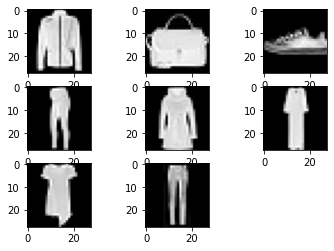

In [25]:
for i in range(331, 339):
    plt.subplot(i)
    random_num = np.random.randint(0,len(X_train))
    plt.imshow(X_train[random_num], cmap=plt.get_cmap('gray'))

In [26]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

X_train = X_train.reshape(len(X_train), input_shape[0], input_shape[1], input_shape[2])
X_test = X_test.reshape(len(X_test), input_shape[0], input_shape[1], input_shape[2])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [27]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [42]:
num_classes = y_test.shape[1]

batch_size = 64
epochs = 3

model = Sequential()

model.add(Conv2D(32, 
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64,
                 (3,3),
                 activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adadelta(),
              metrics = ['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_16 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_17 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)             

In [43]:
history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose = 0)

print('Test Loss:',score[0], 'Test Accuracy:', score[1])

Epoch 1/3
938/938 [==============================] - 117s 124ms/step - loss: 2.8165 - accuracy: 0.2217 - val_loss: 0.9773 - val_accuracy: 0.6665
Epoch 2/3
938/938 [==============================] - 133s 142ms/step - loss: 1.3933 - accuracy: 0.5449 - val_loss: 0.7452 - val_accuracy: 0.7332
Epoch 3/3
938/938 [==============================] - 132s 141ms/step - loss: 1.0995 - accuracy: 0.6342 - val_loss: 0.6627 - val_accuracy: 0.7619
Test Loss: 0.6626771092414856 Test Accuracy: 0.761900007724762
